<a href="https://colab.research.google.com/github/rajshekharsingh66/Stock-Prediction-Using-LSTM/blob/main/Stock_Prediction_using_stacked_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
### Data Collection
import pandas as pd
import pandas_datareader as pdr

In [ ]:
df = pdr.get_data_tiingo('AAPL',api_key=api_key)
df.to_csv('AAPL.csv')

<ipython-input-54-39cb4e41806f>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL',api_key=api_key)


In [ ]:
df= pd.read_csv('AAPL.csv')

In [ ]:
df

In [ ]:
df1 = df.reset_index()['close']
df1.shape
df1

0       223.10
1       221.30
2       218.33
3       223.85
4       221.07
         ...  
1251    180.19
1252    184.12
1253    187.65
1254    187.87
1255    189.46
Name: close, Length: 1256, dtype: float64

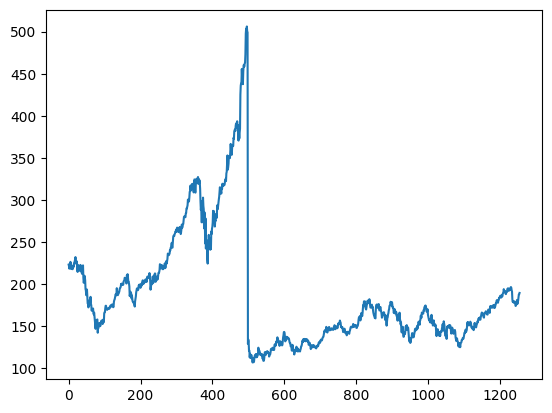

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
import numpy as np

In [ ]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

In [ ]:
training_size = int(len(df1) * 0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

In [ ]:
len(train_data) , len(test_data)

(816, 440)

In [ ]:
import numpy
def create_dataset(dataset,time_step = 1):
  dataX, dataY = [],[]
  for i in range(len(dataset) - time_step - 1):
    a = dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return numpy.array(dataX),numpy.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data,time_step)
X_test,ytest = create_dataset(test_data,time_step)

In [ ]:
print(X_train)

[[0.29119599 0.28668754 0.27924859 ... 0.12388228 0.11982467 0.14629931]
 [0.28668754 0.27924859 0.29307451 ... 0.11982467 0.14629931 0.1492799 ]
 [0.27924859 0.29307451 0.28611146 ... 0.14629931 0.1492799  0.14948028]
 ...
 [0.09450219 0.09117095 0.09585473 ... 0.13570445 0.13668128 0.13800877]
 [0.09117095 0.09585473 0.09432686 ... 0.13668128 0.13800877 0.12515967]
 [0.09585473 0.09432686 0.09718222 ... 0.13800877 0.12515967 0.13375078]]


In [ ]:
print(X_test.shape)
print(ytest.shape)

(339, 100)
(339,)


In [ ]:
print(X_train.shape)
print(y_train.shape)

(715, 100)
(715,)


In [ ]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer = 'adam')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data= (X_test,ytest),epochs=100,batch_size= 64,verbose=1)

Epoch 1/100
12/12 [==============================] - 10s 296ms/step - loss: 0.0379 - val_loss: 9.1566e-04
Epoch 2/100
12/12 [==============================] - 2s 188ms/step - loss: 0.0157 - val_loss: 0.0033
Epoch 3/100
12/12 [==============================] - 2s 187ms/step - loss: 0.0109 - val_loss: 5.1414e-04
Epoch 4/100
12/12 [==============================] - 3s 245ms/step - loss: 0.0096 - val_loss: 3.7148e-04
Epoch 5/100
12/12 [==============================] - 3s 208ms/step - loss: 0.0084 - val_loss: 0.0013
Epoch 6/100
12/12 [==============================] - 2s 186ms/step - loss: 0.0079 - val_loss: 6.7260e-04
Epoch 7/100
12/12 [==============================] - 2s 185ms/step - loss: 0.0069 - val_loss: 4.5178e-04
Epoch 8/100
12/12 [==============================] - 2s 186ms/step - loss: 0.0075 - val_loss: 3.3109e-04
Epoch 9/100
12/12 [==============================] - 2s 209ms/step - loss: 0.0058 - val_loss: 4.9843e-04
Epoch 10/100
12/12 [==============================] - 3s 251ms

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.12.0'

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

11/11 [==============================] - 1s 53ms/step


In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

220.51758873353398

In [ ]:
math.sqrt(mean_squared_error(ytest,test_predict))

157.03036739612847

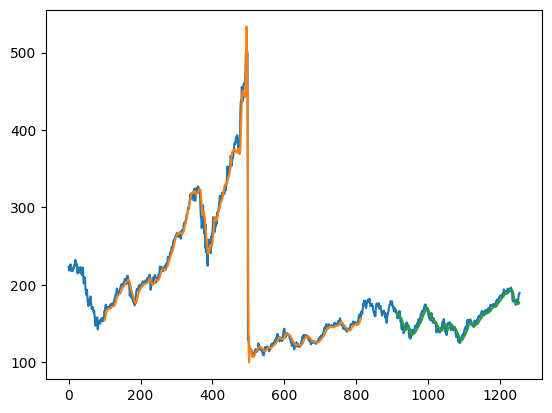

In [ ]:
look_back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:,:] = numpy.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:,:] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:] = test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

440

In [ ]:
x_input = test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [ ]:
from numpy import array
lst_output= []
n_steps = 100
i =0
while(i<30):
  if(len(temp_input)>100):
    x_input = np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input))
    x_input = x_input.reshape(1,-1)
    x_input = x_input.reshape((1,n_steps,1))
    yhat = model.predict(x_input,verbose = 0)
    print("{} day output {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input = temp_input[1:]
    lst_output.extend(yhat.tolist())
    i= i+1
  else:
    x_input = x_input.reshape((1,n_steps,1))
    yhat = model.predict(x_input,verbose = 0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i=i+1

0 day input [0.16568566 0.17179712 0.1764809  0.17635567 0.183469   0.18562304
 0.18219161 0.18126487 0.17778334 0.18467126 0.18564809 0.19273638
 0.19153413 0.19313713 0.19829681 0.19556669 0.19579211 0.19316218
 0.20077646 0.19997495 0.19644333 0.20343143 0.20641202 0.20726362
 0.21823419 0.2144521  0.21162179 0.21282405 0.20999374 0.20480902
 0.20348153 0.20771446 0.20964308 0.21001879 0.21828428 0.21763306
 0.2210645  0.21613024 0.21314966 0.21517846 0.21735755 0.21956168
 0.21635567 0.22289292 0.22444584 0.22232937 0.21475266 0.21122104
 0.18822793 0.18036318 0.18274264 0.17871008 0.17815905 0.1777082
 0.18189105 0.17685661 0.17465247 0.1682154  0.16944271 0.17282405
 0.17630557 0.18604884 0.17417658 0.17976205 0.18371947 0.19356293
 0.20240451 0.20295554 0.20693801 0.18394661 0.18668567 0.18793944
 0.18815222 0.18778256 0.18715499 0.1864545  0.18576424 0.18510637
 0.18447174 0.18383893 0.18318497 0.18249092 0.18174408 0.18093883
 0.18007593 0.17916112 0.17820385 0.17721562 0.1762

In [ ]:
print(lst_output)

[[0.18668566644191742], [0.18793943524360657], [0.1881522238254547], [0.18778255581855774], [0.18715499341487885], [0.18645450472831726], [0.18576423823833466], [0.18510636687278748], [0.1844717413187027], [0.18383893370628357], [0.18318496644496918], [0.18249091506004333], [0.18174408376216888], [0.18093882501125336], [0.18007592856884003], [0.17916111648082733], [0.17820385098457336], [0.17721562087535858], [0.17620864510536194], [0.17519459128379822], [0.17418362200260162], [0.17318424582481384], [0.1722024381160736], [0.17124228179454803], [0.170305535197258], [0.16939228773117065], [0.16850104928016663], [0.16762931644916534], [0.16677403450012207], [0.1659316122531891]]


In [ ]:
day_new= np.arange(1,101)
day_pred= np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

1256

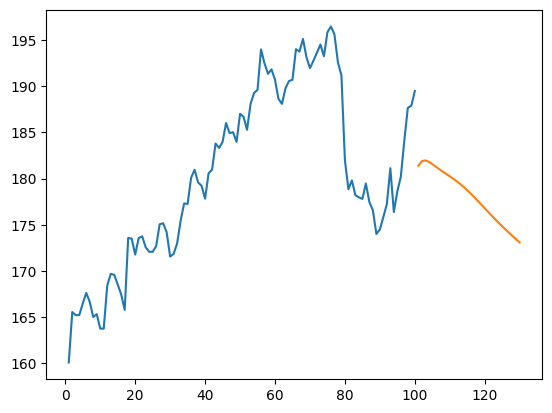

In [ ]:
df3= df1.tolist()
df3.extend(lst_output)
plt.plot(day_new,scaler.inverse_transform(df1[1156:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

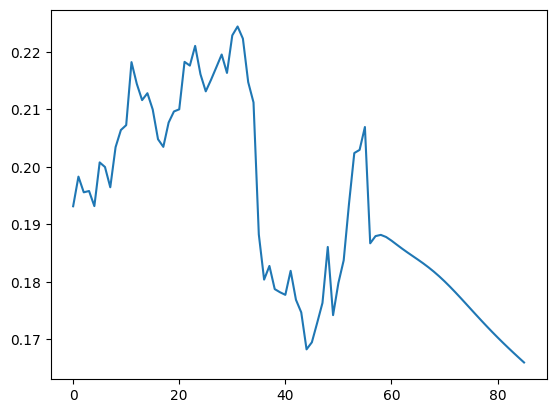

In [ ]:
df3= df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])